# WhatsApp Chat Analysis

In [66]:
pip install emoji

In [4]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=8b4d0c04bef4a4a104ff4515cced04e98ebc162b6e3b74b2db7ef5553d30170c
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

In [8]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [2]:
import regex as re
import pandas as pd
import numpy as np
import emoji 
from emoji import emojize
import plotly.express as px
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Function for date and time 
Need to change the format of the date and time of messages. For this I will define a function that can detect whether each line starts with a date as it states that it is a unique message:

In [3]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    
    return False

# function to extract the usernames in the chats as Authors:



In [4]:
def FindAuthor(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Function to separate all the information from each other so that we could easily use the information as a pandas dataframe:

In [5]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

# Time to get data

In [37]:
#from google.colab import files
#uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'C:/Users/lenovo/Desktop/datasets/whats_app/WhatsAppChat1.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    parsedData=[]
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Now, let’s put the data into a dataframe and have a look at the data:

In [38]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
16,2021-04-05,7:27 PM,Aarti DS,Email id . aartisapkal777@gmail.com Skyp live:...
17,2021-04-05,7:28 PM,Digital Trainee,Done
18,2021-04-06,9:59 AM,Digital Trainee,meet.google.com/xxa-tynu-gkk Batch Link - 10AM
19,2021-04-06,10:05 AM,Aarti DS,Email pe link bhej do na
20,2021-04-06,10:08 AM,Digital Trainee,Done
21,2021-04-06,10:09 AM,Aarti DS,Thanks
22,2021-04-07,10:01 AM,RD,Hello gm
23,2021-04-07,10:01 AM,Aarti DS,Gm
24,2021-04-07,10:01 AM,RD,Today's lecture link?
25,2021-04-07,10:03 AM,Digital Trainee,meet.google.com/xxa-tynu-gkk Batch Link - 10AM


In [27]:
df.head(20)

,Date,Time,Author,Message
0,2021-04-05,11:10 AM,None,"Digital Trainee created group ""DS Batch 10AM t..."
1,2021-04-05,11:10 AM,None,Digital Trainee added you
2,2021-04-05,11:22 AM,None,Digital Trainee added Onkar DS
3,2021-04-05,12:25 PM,None,Digital Trainee added Shruti
4,2021-04-05,12:36 PM,Digital Trainee,"Hello Everyone, Kindly create your Skype account."
5,2021-04-05,12:46 PM,RD,Ok
6,2021-04-05,3:20 PM,Shruti,Done
7,2021-04-05,4:16 PM,Vinay DS,Done. My Skype id- live:khujatvinay
8,2021-04-05,4:24 PM,Digital Trainee,Great Vinay. Remaining all kindly do the same.
9,2021-04-05,4:25 PM,None,RD: live:rashdeshmukh93


# Now start What's App Chat Analysis

# To Get All The Authors:

In [43]:
df.Author.unique()

array([None, 'Digital Trainee', 'RD', 'Shruti', 'Vinay DS', 'Onkar DS',
       'Aarti DS'], dtype=object)

In [59]:
#Messgaes by its Author RD
df['Message'][df['Author']=="RD"]

5                        Ok
22                 Hello gm
24    Today's lecture link?
27                       Ok
30                       Ok
Name: Message, dtype: object

In [46]:
total_messages = df['Message'].value_counts().sum()
print(total_messages)

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list


df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)


URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("What's App GroupChat Details:- ")
#print("Messages:",total_messages)
print("Total Messages:",total_messages)
print("Emojis:",emojis)
print("Links:",links)

36
0
What's App GroupChat Details:- 
Total Messages: 36
Emojis: 0
Links: 1


# Now we will look at the author wise status from the WhatsApp group chat:

In [52]:
media_messages_df = df[df['Message'] == 'DS Batch 10AM to 12PM']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["RD", "Shruti", "Vinay DS"]
for i in range(len(l)):
  # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)
  #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
  # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
  #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)   
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      36 non-null     datetime64[ns]
 1   Time      36 non-null     object        
 2   Author    28 non-null     object        
 3   Message   36 non-null     object        
 4   emoji     36 non-null     object        
 5   urlcount  36 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.0+ KB
Stats of RD -
Messages Sent 5
Words per message 1.6
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Shruti -
Messages Sent 1
Words per message 1.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Vinay DS -
Messages Sent 3
Words per message 2.3333333333333335
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



# Now let’s have a look at the most emojis used in the group:

In [53]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)

In [ ]:
Author wise WordCloud:

Author name RD


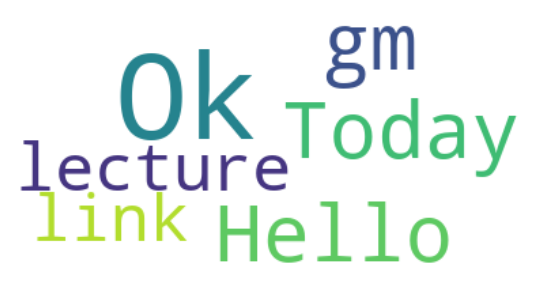

Author name Shruti


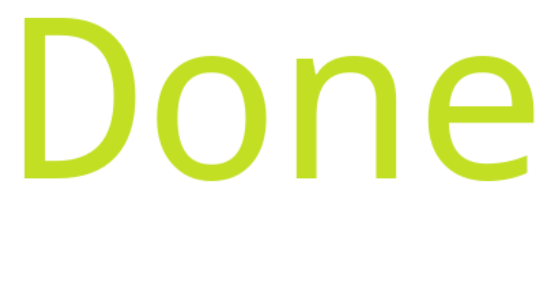

Author name Vinay DS


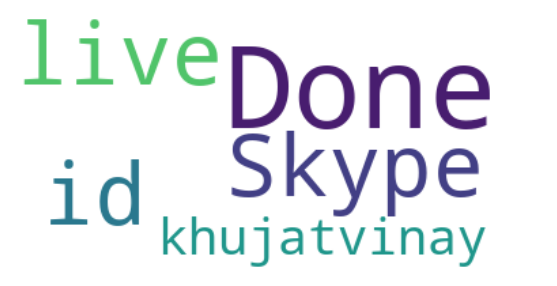

In [55]:
l = ["RD", "Shruti", "Vinay DS"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
  #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# WhatsApp Group Chat Analysis: Word Cloud

There are 1102 words in all the messages.


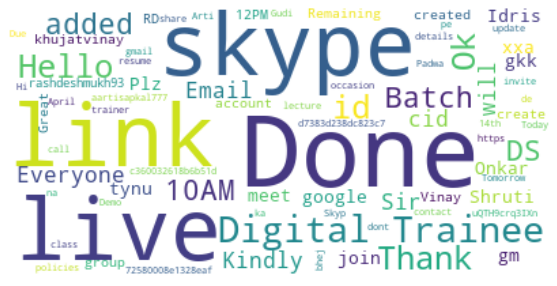

In [56]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- - -